In [133]:
import numpy as np
from Classes import NeuralNetwork, Gradient, initialize_classes
from sklearn.preprocessing import StandardScaler
import random
np.random.seed(2024) #We also got the seeds in the relevant functions that uses randomized features
random.seed(2024)

In [134]:
from Utilities import cross_entropy, cross_entropy_der, sigmoid, sigmoid_der, mse, mse_der, linear,linear_der, cost_func

Poly_conditions = {
    "layer_output_sizes": np.array([40, 50, 1]),
    "activation_funcs": [sigmoid,     sigmoid,     linear],
    "activation_ders": [sigmoid_der,  sigmoid_der, linear_der],
    "tolerance": 1e-5,
    "batch_size": 10,
    "cost_fun": cost_func,
    "cost_der": mse_der,
    "max_iter": 4000,
    "beta1": 0.9,
    "beta2": 0.999,
    "rho": 0.9,
    "Delta": 1e-7,
    "eta_Normal": {"GD": 0.2, "AdaGrad": 0.11, "Adam": 0.01, "RMSprop": 0.001}, 
    "eta_Stochastic": {"GD": 0.1, "AdaGrad": 0.1, "Adam": 0.01, "RMSprop": 0.001},  
    "use_momentum": False,
    "lamda": 0.0,
    "dm": 0.1
}
Methods = ["Normal", "Stochastic"]
commands = ["GD", "AdaGrad", "RMSprop","Adam"]

# Running Normal and Stochastic OLS

In [135]:
from Functions import train_command_poly, get_data
from sklearn.model_selection import train_test_split

### First checking the results from OLS and Ridge regression

In [136]:
Inputs, Targets = get_data("polynomial", nn=1000, pp=3)
lamda = 0.001
x_train, x_test, targets_train, targets_test = train_test_split(Inputs, Targets, test_size=0.20, random_state=123)

theta_OLS = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ targets_train
theta_Ridge = np.linalg.inv(x_train.T @ x_train + np.identity(x_train.shape[1]) * lamda) @ x_train.T @ targets_train
ols = x_test@theta_OLS
rid = x_test@theta_Ridge


print(f"OLS              = {np.mean( (ols-targets_test)**2 ):.5f}")
print(f"Ridge(l={lamda}) = {np.mean( (rid-targets_test)**2 ):.5f} ")

OLS              = 0.01040
Ridge(l=0.001) = 0.01040 


In [137]:
poly_normal_results_no_momentum = train_command_poly(["Normal","Stochastic"], commands, Gradient_type= "Normal", 
                                    initial_conditions=Poly_conditions,Scale=False, Custom = None)


For Normal, with GD, lambda =  0.0 momentum = False:
MSE = 0.0104
R2  = 0.9952 
For Normal, with AdaGrad, lambda =  0.0 momentum = False:
MSE = 0.0119
R2  = 0.9945 
For Normal, with RMSprop, lambda =  0.0 momentum = False:
MSE = 0.0104
R2  = 0.9952 
For Normal, with Adam, lambda =  0.0 momentum = False:
MSE = 0.0109
R2  = 0.9950 
For Stochastic, with GD, lambda =  0.0 momentum = False:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with AdaGrad, lambda =  0.0 momentum = False:
MSE = 0.0108
R2  = 0.9950 
For Stochastic, with RMSprop, lambda =  0.0 momentum = False:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with Adam, lambda =  0.0 momentum = False:
MSE = 0.0106
R2  = 0.9951 


In [11]:
AddMom = {
        "use_momentum": True,
}
poly_normal_results_momentum = train_command_poly(["Normal","Stochastic"], commands, Gradient_type= "Normal", 
                                    initial_conditions=Poly_conditions,Scale=False, Custom = AddMom)


For Normal, with GD, lambda =  0.0 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Normal, with AdaGrad, lambda =  0.0 momentum = True:
MSE = 0.0118
R2  = 0.9946 
For Normal, with RMSprop, lambda =  0.0 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Normal, with Adam, lambda =  0.0 momentum = True:
MSE = 0.0108
R2  = 0.9950 
For Stochastic, with GD, lambda =  0.0 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with AdaGrad, lambda =  0.0 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with RMSprop, lambda =  0.0 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with Adam, lambda =  0.0 momentum = True:
MSE = 0.0106
R2  = 0.9951 


# Comparing with AutoGrad

In [138]:
poly_autograd_results_momentum = train_command_poly(["Normal","Stochastic"], commands, Gradient_type= "AutoGrad", 
                                    initial_conditions=Poly_conditions, Scale=False, Custom = AddMom)

For Normal, with GD, lambda =  0.0 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Normal, with AdaGrad, lambda =  0.0 momentum = True:
MSE = 0.0118
R2  = 0.9946 
For Normal, with RMSprop, lambda =  0.0 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Normal, with Adam, lambda =  0.0 momentum = True:
MSE = 0.0108
R2  = 0.9950 
For Stochastic, with GD, lambda =  0.0 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with AdaGrad, lambda =  0.0 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with RMSprop, lambda =  0.0 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with Adam, lambda =  0.0 momentum = True:
MSE = 0.0106
R2  = 0.9951 


In [ ]:
poly_autograd_results_momentum = train_command_poly(["Normal","Stochastic"], commands, Gradient_type= "AutoGrad", 
                                    initial_conditions=Poly_conditions, Scale=False, Custom = None)

For Normal, with GD, lambda =  0.0 momentum = False:
MSE = 0.0104
R2  = 0.9952 
For Normal, with AdaGrad, lambda =  0.0 momentum = False:
MSE = 0.0119
R2  = 0.9945 
For Normal, with RMSprop, lambda =  0.0 momentum = False:
MSE = 0.0104
R2  = 0.9952 
For Normal, with Adam, lambda =  0.0 momentum = False:
MSE = 0.0109
R2  = 0.9950 
For Stochastic, with GD, lambda =  0.0 momentum = False:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with AdaGrad, lambda =  0.0 momentum = False:
MSE = 0.0108
R2  = 0.9950 
For Stochastic, with RMSprop, lambda =  0.0 momentum = False:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with Adam, lambda =  0.0 momentum = False:
MSE = 0.0106
R2  = 0.9951 


# Ridge

In [15]:
UpdateLamda = {
    "lamda": 0.0001
}
ridge_normal_results_no_momentum = train_command_poly(["Normal","Stochastic"], commands, Gradient_type= "Normal", 
                                    initial_conditions=Poly_conditions,Scale=False, Custom = UpdateLamda)

For Normal, with GD, lambda =  0.0001 momentum = False:
MSE = 0.0105
R2  = 0.9952 
For Normal, with AdaGrad, lambda =  0.0001 momentum = False:
MSE = 0.0119
R2  = 0.9945 
For Normal, with RMSprop, lambda =  0.0001 momentum = False:
MSE = 0.0105
R2  = 0.9952 
For Normal, with Adam, lambda =  0.0001 momentum = False:
MSE = 0.0109
R2  = 0.9950 
For Stochastic, with GD, lambda =  0.0001 momentum = False:
MSE = 0.0105
R2  = 0.9952 
For Stochastic, with AdaGrad, lambda =  0.0001 momentum = False:
MSE = 0.0105
R2  = 0.9952 
For Stochastic, with RMSprop, lambda =  0.0001 momentum = False:
MSE = 0.0105
R2  = 0.9952 
For Stochastic, with Adam, lambda =  0.0001 momentum = False:
MSE = 0.0106
R2  = 0.9951 


In [16]:
AddMomLamda = {
        "use_momentum": True,
        "lamda": 0.0001
}
ridge_normal_results_no_momentum = train_command_poly(["Normal","Stochastic"], commands, Gradient_type= "Normal", 
                                    initial_conditions=Poly_conditions,Scale=False, Custom = AddMomLamda)

For Normal, with GD, lambda =  0.0001 momentum = True:
MSE = 0.0105
R2  = 0.9952 
For Normal, with AdaGrad, lambda =  0.0001 momentum = True:
MSE = 0.0118
R2  = 0.9946 
For Normal, with RMSprop, lambda =  0.0001 momentum = True:
MSE = 0.0105
R2  = 0.9952 
For Normal, with Adam, lambda =  0.0001 momentum = True:
MSE = 0.0108
R2  = 0.9950 
For Stochastic, with GD, lambda =  0.0001 momentum = True:
MSE = 0.0105
R2  = 0.9952 
For Stochastic, with AdaGrad, lambda =  0.0001 momentum = True:
MSE = 0.0105
R2  = 0.9952 
For Stochastic, with RMSprop, lambda =  0.0001 momentum = True:
MSE = 0.0105
R2  = 0.9952 
For Stochastic, with Adam, lambda =  0.0001 momentum = True:
MSE = 0.0106
R2  = 0.9951 


# Comparing Ridge with AutoGrad

In [17]:
ridge_autograd_results_no_momentum = train_command_poly(["Normal","Stochastic"], commands, Gradient_type= "AutoGrad", 
                                    initial_conditions=Poly_conditions, Scale=False, Custom = UpdateLamda)

For Normal, with GD, lambda =  0.0001 momentum = False:
MSE = 0.0104
R2  = 0.9952 
For Normal, with AdaGrad, lambda =  0.0001 momentum = False:
MSE = 0.0119
R2  = 0.9945 
For Normal, with RMSprop, lambda =  0.0001 momentum = False:
MSE = 0.0104
R2  = 0.9952 
For Normal, with Adam, lambda =  0.0001 momentum = False:
MSE = 0.0109
R2  = 0.9950 
For Stochastic, with GD, lambda =  0.0001 momentum = False:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with AdaGrad, lambda =  0.0001 momentum = False:
MSE = 0.0108
R2  = 0.9950 
For Stochastic, with RMSprop, lambda =  0.0001 momentum = False:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with Adam, lambda =  0.0001 momentum = False:
MSE = 0.0106
R2  = 0.9951 


In [18]:
ridge_autograd_results_momentum = train_command_poly(["Normal","Stochastic"], commands, Gradient_type= "AutoGrad", 
                                    initial_conditions=Poly_conditions, Scale=False, Custom = AddMomLamda)

For Normal, with GD, lambda =  0.0001 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Normal, with AdaGrad, lambda =  0.0001 momentum = True:
MSE = 0.0118
R2  = 0.9946 
For Normal, with RMSprop, lambda =  0.0001 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Normal, with Adam, lambda =  0.0001 momentum = True:
MSE = 0.0108
R2  = 0.9950 
For Stochastic, with GD, lambda =  0.0001 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with AdaGrad, lambda =  0.0001 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with RMSprop, lambda =  0.0001 momentum = True:
MSE = 0.0104
R2  = 0.9952 
For Stochastic, with Adam, lambda =  0.0001 momentum = True:
MSE = 0.0106
R2  = 0.9951 


# Mapping MSE for different $\lambda$ and $\eta$

In [207]:
Customm = {
    "use_momentum":False,
    "cost_fun": cost_func,
}
n_l = 8
n_eta = 8
lamda_list = np.logspace(-3, -2, n_l)  
eta_list = np.logspace(-4, -1, n_eta) 

Inputs, Targets = get_data("polynomial", nn=1000, pp=3)

x_train, x_test, targets_train, targets_test = train_test_split(Inputs, Targets, test_size=0.20, random_state=123)

_, Optimizer = initialize_classes(Poly_conditions, x_train, targets_train, custom_conditions=Customm)

Mse_Matrix, result_list = Optimizer.mse_lambda_eta(lamda_list, eta_list, "Stochastic", Gradient_type ="Normal", 
                        command = "Adam", 
                        X_test = x_test, 
                        Targets_test = targets_test )

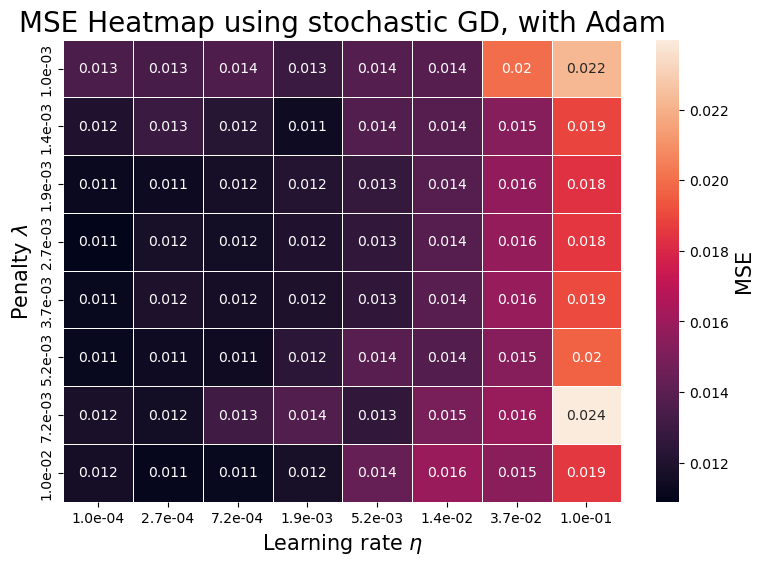

For stochastic GD, with Adam
Best Lambda = 0.00268
Best ETA = 0.0001
Giving MSE = 0.0109


In [210]:
from Functions import heatmap
HeatMapTitle = f"MSE Heatmap using stochastic GD, with Adam"
Filenamer = "Stok_Adam"
heatmap(Mse_Matrix, HeatMapTitle, Filenamer, eta_list, lamda_list, LogScale = False)

best_lambda, best_eta, min_mse = Optimizer.find_hyperparameters(Mse_Matrix, eta_list, lamda_list)
print(f"For stochastic GD, with Adam")
print(f"Best Lambda = {best_lambda:.3g}")
print(f"Best ETA = {best_eta:.2g}")
print(f"Giving MSE = {min_mse:.3g}")


# Neural Network

First we make the initial conditions for OLS with backpropagation

In [101]:
Poly_conditions = {
    "layer_output_sizes": np.array([40, 50, 1]),
    "activation_funcs": [sigmoid,     sigmoid,     linear],
    "activation_ders": [sigmoid_der,  sigmoid_der, linear_der],
    "tolerance": 1e-5,
    "batch_size": 10,
    "cost_fun": mse,
    "cost_der": mse_der,
    "max_iter": 4000,
    "beta1": 0.9,
    "beta2": 0.999,
    "rho": 0.9,
    "Delta": 1e-7,
    "eta_Normal": {"GD": 0.02, "AdaGrad": 0.11, "Adam": 0.001, "RMSprop": 0.0001}, 
    "eta_Stochastic": {"GD": 0.02, "AdaGrad": 0.11, "Adam": 0.001, "RMSprop": 0.0005},  
    "use_momentum": False,
    "lamda": 0.0,
    "dm": 0.1
}

### Running Neural Network with backpropagation gradients on polynomial

In [103]:
Poly_Back_NoMom = train_command_poly(["Normal","Stochastic"], commands, Gradient_type= "Back", 
                                    initial_conditions = Poly_conditions, 
                                    Scale=False, Custom = None, MLP = True)

For Normal, with GD, lambda =  0.0 momentum = False:
MSE = 0.0119
R2  = 0.9945 
For Normal, with AdaGrad, lambda =  0.0 momentum = False:
MSE = 0.0107
R2  = 0.9951 
For Normal, with RMSprop, lambda =  0.0 momentum = False:
MSE = 0.0112
R2  = 0.9949 
For Normal, with Adam, lambda =  0.0 momentum = False:
MSE = 0.0103
R2  = 0.9952 
For Stochastic, with GD, lambda =  0.0 momentum = False:
MSE-MLP = 0.0180 
R2-MLP  = 0.9917 
MSE = 0.0123
R2  = 0.9943 
For Stochastic, with AdaGrad, lambda =  0.0 momentum = False:
MSE = 0.0181
R2  = 0.9917 
For Stochastic, with RMSprop, lambda =  0.0 momentum = False:
MSE = 0.0168
R2  = 0.9923 
For Stochastic, with Adam, lambda =  0.0 momentum = False:
MSE-MLP = 0.0138 
R2-MLP  = 0.9936 
MSE = 0.0123
R2  = 0.9943 


In [104]:
AddMom = {
        "use_momentum": True,
}
Poly_Back_Mom = train_command_poly(["Normal","Stochastic"], commands, Gradient_type= "Back", 
                                    initial_conditions=Poly_conditions,Scale=False, Custom = AddMom, MLP = True)

For Normal, with GD, lambda =  0.0 momentum = True:
MSE = 0.0115
R2  = 0.9947 
For Normal, with AdaGrad, lambda =  0.0 momentum = True:
MSE = 0.0105
R2  = 0.9951 
For Normal, with RMSprop, lambda =  0.0 momentum = True:
MSE = 0.0112
R2  = 0.9948 
For Normal, with Adam, lambda =  0.0 momentum = True:
MSE = 0.0103
R2  = 0.9952 
For Stochastic, with GD, lambda =  0.0 momentum = True:
MSE-MLP = 0.0174 
R2-MLP  = 0.9920 
MSE = 0.0117
R2  = 0.9946 
For Stochastic, with AdaGrad, lambda =  0.0 momentum = True:
MSE = 0.0143
R2  = 0.9934 
For Stochastic, with RMSprop, lambda =  0.0 momentum = True:
MSE = 0.0182
R2  = 0.9916 
For Stochastic, with Adam, lambda =  0.0 momentum = True:
MSE-MLP = 0.0138 
R2-MLP  = 0.9936 
MSE = 0.0123
R2  = 0.9943 


# Testing different activation functions

In [105]:
from Utilities import ReLU, ReLU_der, leakyReLU, leakyReLU_der

ReLUAdd = {
    "use_momentum": True,
    "activation_funcs": [ReLU,     ReLU,     linear],
    "activation_ders": [ReLU_der, ReLU_der, linear_der]
}
LReLUAdd = {
    "use_momentum": True,
    "activation_funcs": [leakyReLU,     leakyReLU,     linear],
    "activation_ders": [leakyReLU_der, leakyReLU_der, linear_der]
}

Commands = ["AdaGrad", "RMSprop", "Adam"]

In [106]:
Poly_ReLU_Back_Mom = train_command_poly(["Stochastic"], Commands, Gradient_type= "Back", 
                                    initial_conditions=Poly_conditions,Scale=False, Custom = ReLUAdd, MLP = True)

For Stochastic, with AdaGrad, lambda =  0.0 momentum = True:
MSE = 0.0110
R2  = 0.9949 
For Stochastic, with RMSprop, lambda =  0.0 momentum = True:
MSE = 0.0131
R2  = 0.9939 
For Stochastic, with Adam, lambda =  0.0 momentum = True:
MSE-MLP = 0.0123 
R2-MLP  = 0.9943 
MSE = 0.0101
R2  = 0.9953 


In [107]:
Poly_LReLU_Back_Mom = train_command_poly(["Stochastic"], Commands, Gradient_type= "Back", 
                                    initial_conditions=Poly_conditions,Scale=False, Custom = LReLUAdd, MLP = False)

For Stochastic, with AdaGrad, lambda =  0.0 momentum = True:
MSE = 0.0115
R2  = 0.9947 
For Stochastic, with RMSprop, lambda =  0.0 momentum = True:
MSE = 0.0201
R2  = 0.9908 
For Stochastic, with Adam, lambda =  0.0 momentum = True:
MSE = 0.0102
R2  = 0.9953 


# Classification using Neural Network

In [108]:
initial_conditions = {
    "layer_output_sizes": np.array([20, 25,  1]),
    "activation_funcs": [sigmoid,  sigmoid,  sigmoid],
    "activation_ders": [sigmoid_der, sigmoid_der, sigmoid_der],
    "batch_size": 10,
    "tolerance": 1e-5,
    "beta1": 0.9,
    "max_iter": 3000,
    "beta2": 0.999,
    "use_momentum": True,
    "rho": 0.9,
    "Delta": 1e-7,
    "eta_Normal": {"GD": 0.1, "AdaGrad": 0.1, "Adam": 0.01, "RMSprop": 0.001}, 
    "eta_Stochastic": {"GD": 0.1, "AdaGrad": 0.1, "Adam": 0.01, "RMSprop": 0.001}, 
    "cost_fun": cross_entropy,
    "cost_der": cross_entropy_der,
    "lamda": 0.0,
    "dm": 0.1
}

Inputs, Targets = get_data("cancer")

In [109]:
from Functions import train_command, pred_target_dict, plot_confusion_matrices

In [110]:
scaler = StandardScaler()
Inputs = scaler.fit_transform(Inputs)

In [111]:
case_list , target_list = train_command(Inputs, Targets, ["Normal"], 
                                        commands, Gradient_type= "Back", 
                                        initial_conditions=initial_conditions, 
                                        MLP=True, Custom = None)

For Normal, with GD, momentum = True:
Accuracy    = 0.98830
For Normal, with AdaGrad, momentum = True:
Accuracy    = 0.98830
For Normal, with RMSprop, momentum = True:
Accuracy    = 0.97076
For Normal, with Adam, momentum = True:
Accuracy    = 0.98246


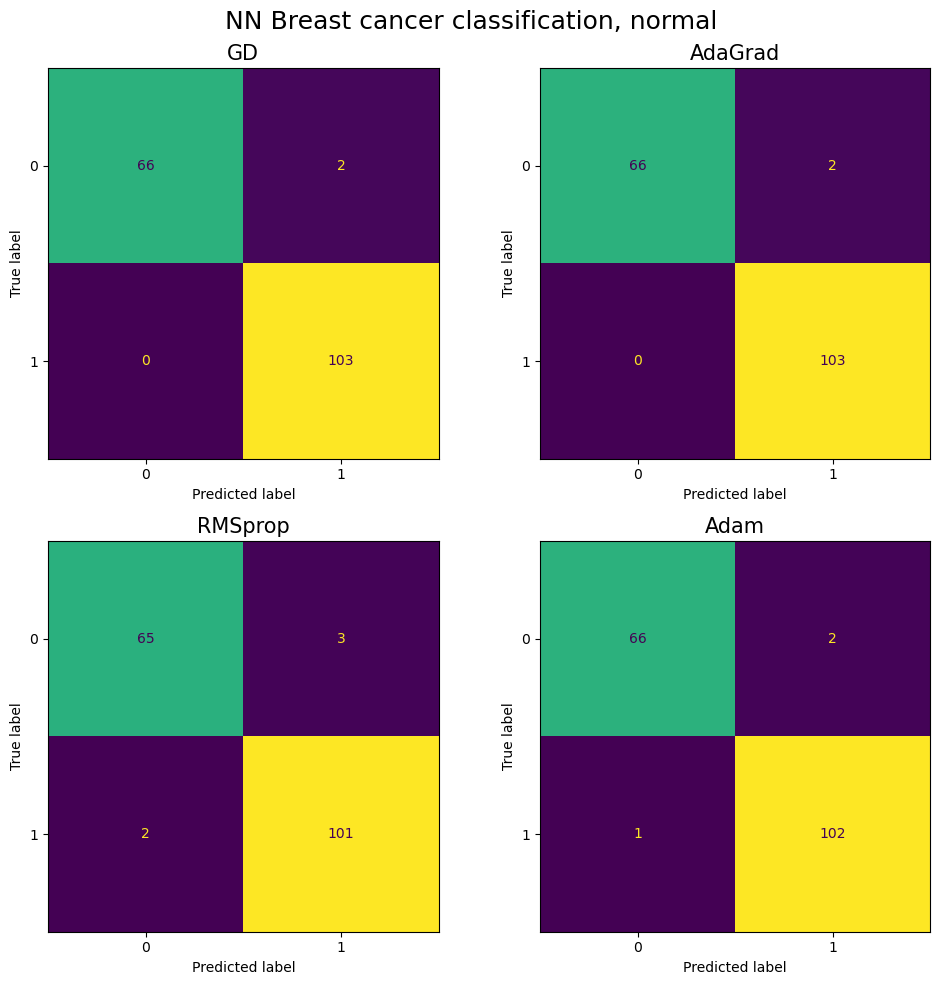

In [112]:
Predictions_dict, Target_dict = pred_target_dict(commands, case_list, target_list)
Title_Norm = "NN Breast cancer classification, normal"
Filename_Norm = "Normal"
plot_confusion_matrices(Predictions_dict,Target_dict,Title_Norm, Filename_Norm, Optimizer=commands)

In [113]:
case_list_s , target_list_s = train_command(Inputs, Targets,["Stochastic"], 
                                        commands, Gradient_type= "Back", 
                                        initial_conditions=initial_conditions, 
                                        MLP=True, Custom = None)

For Stochastic, with GD, momentum = True:
Accuracy MLP = 0.98246
Accuracy    = 0.98830
For Stochastic, with AdaGrad, momentum = True:
Accuracy    = 0.98246
For Stochastic, with RMSprop, momentum = True:
Accuracy    = 0.98830
For Stochastic, with Adam, momentum = True:
Accuracy MLP = 0.97661
Accuracy    = 0.98830


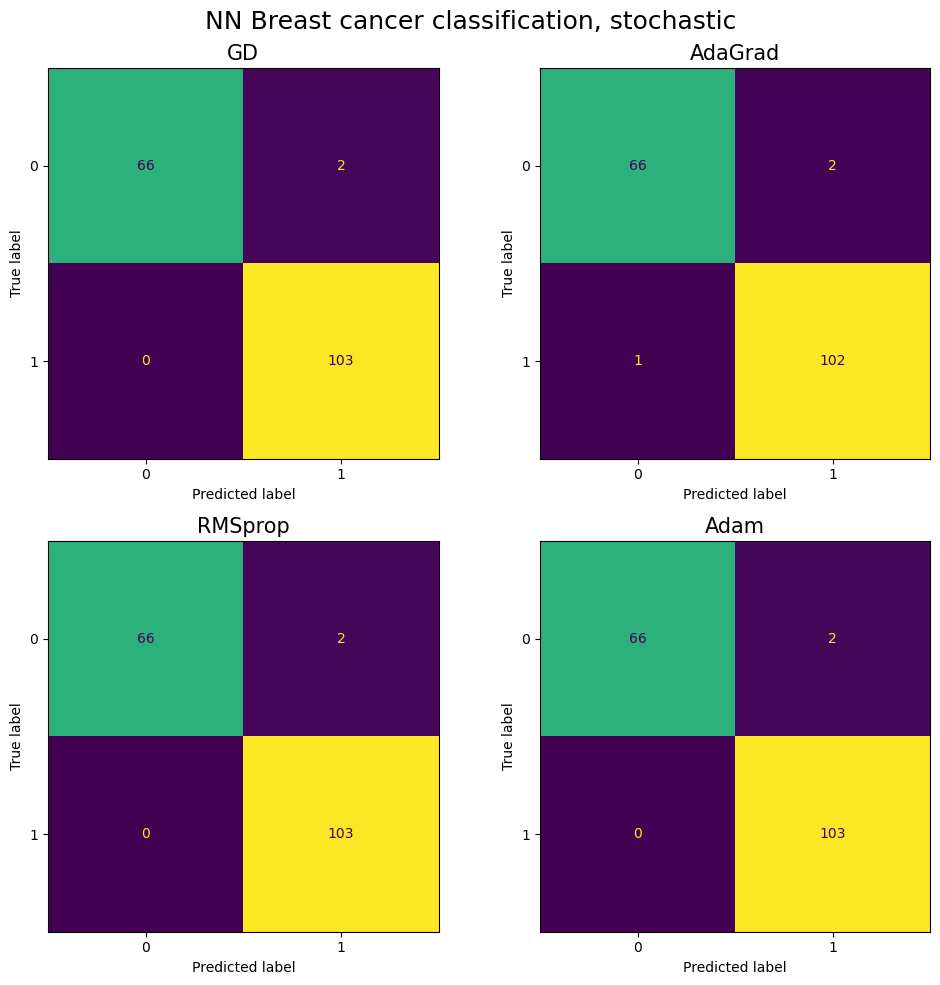

In [114]:
Predictions_dict_s, Target_dict_s = pred_target_dict(commands, case_list_s, target_list_s)
Title_Stok = "NN Breast cancer classification, stochastic"
Filename_Stok = "Stok"
plot_confusion_matrices(Predictions_dict_s,Target_dict,Title_Stok, Filename_Stok, Optimizer=commands)

# Run k-fold cross-validation for better accuracies

In [115]:
from Functions import kFold, kFold_multiple

In [116]:
case_norm_kfold, target_norm_kfold = kFold_multiple(5, "Normal", commands, 
                                    initial_conditions, 
                                    Custom = None, 
                                    Data_type = "cancer", Gradient_type="Back",
                                    MLP=False, sklearn = False)

Accuracy = 0.9649
Accuracy = 0.9561
Accuracy = 0.9912
Accuracy = 0.9825
Accuracy = 0.9823
For Normal with GD
Mean acc after 5-folds = 0.9754
Accuracy = 0.9649
Accuracy = 0.9386
Accuracy = 0.9649
Accuracy = 0.9825
Accuracy = 0.9735
For Normal with AdaGrad
Mean acc after 5-folds = 0.9649
Accuracy = 0.9649
Accuracy = 0.9561
Accuracy = 0.9737
Accuracy = 1.0000
Accuracy = 0.9912
For Normal with RMSprop
Mean acc after 5-folds = 0.9772
Accuracy = 0.9649
Accuracy = 0.9649
Accuracy = 0.9649
Accuracy = 0.9912
Accuracy = 0.9735
For Normal with Adam
Mean acc after 5-folds = 0.9719


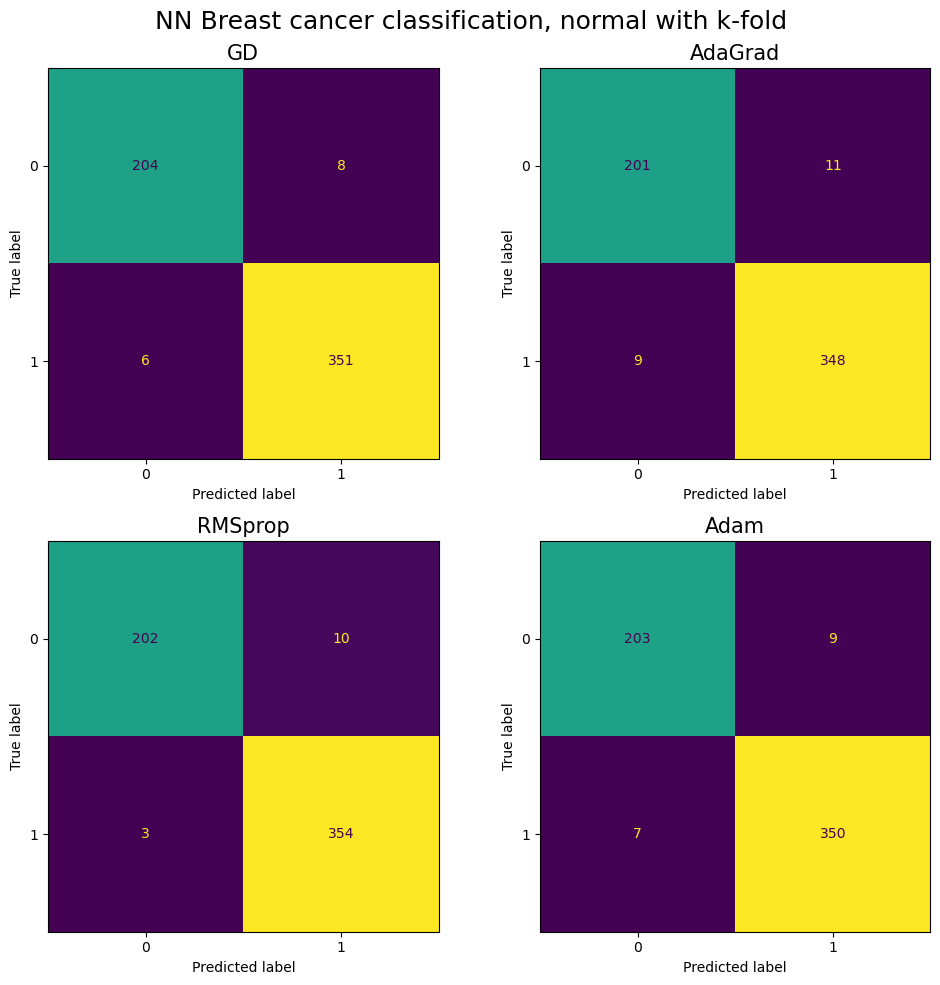

In [117]:
Predictions_norm_kfold, Targets_norm_kfold = pred_target_dict(commands, case_norm_kfold, target_norm_kfold)
Title_Norm_k = "NN Breast cancer classification, normal with k-fold"
Filename_Norm_k = "Normal_kfold"
plot_confusion_matrices(Predictions_norm_kfold, Targets_norm_kfold, Title_Norm_k, Filename_Norm_k, Optimizer=commands)

In [119]:
case_stok_kfold, target_stok_kfold = kFold_multiple(5, "Stochastic", commands, 
                                    initial_conditions, 
                                    Custom = None, 
                                    Data_type = "cancer", Gradient_type="Back",
                                    MLP=False, sklearn = False)

Accuracy = 0.9649
Accuracy = 0.9649
Accuracy = 0.9825
Accuracy = 0.9825
Accuracy = 0.9823
For Stochastic with GD
Mean acc after 5-folds = 0.9754
Accuracy = 0.9649
Accuracy = 0.9561
Accuracy = 0.9825
Accuracy = 1.0000
Accuracy = 0.9735
For Stochastic with AdaGrad
Mean acc after 5-folds = 0.9754
Accuracy = 0.9737
Accuracy = 0.9561
Accuracy = 0.9825
Accuracy = 0.9825
Accuracy = 0.9823
For Stochastic with RMSprop
Mean acc after 5-folds = 0.9754
Accuracy = 0.9649
Accuracy = 0.9474
Accuracy = 0.9825
Accuracy = 1.0000
Accuracy = 0.9823
For Stochastic with Adam
Mean acc after 5-folds = 0.9754


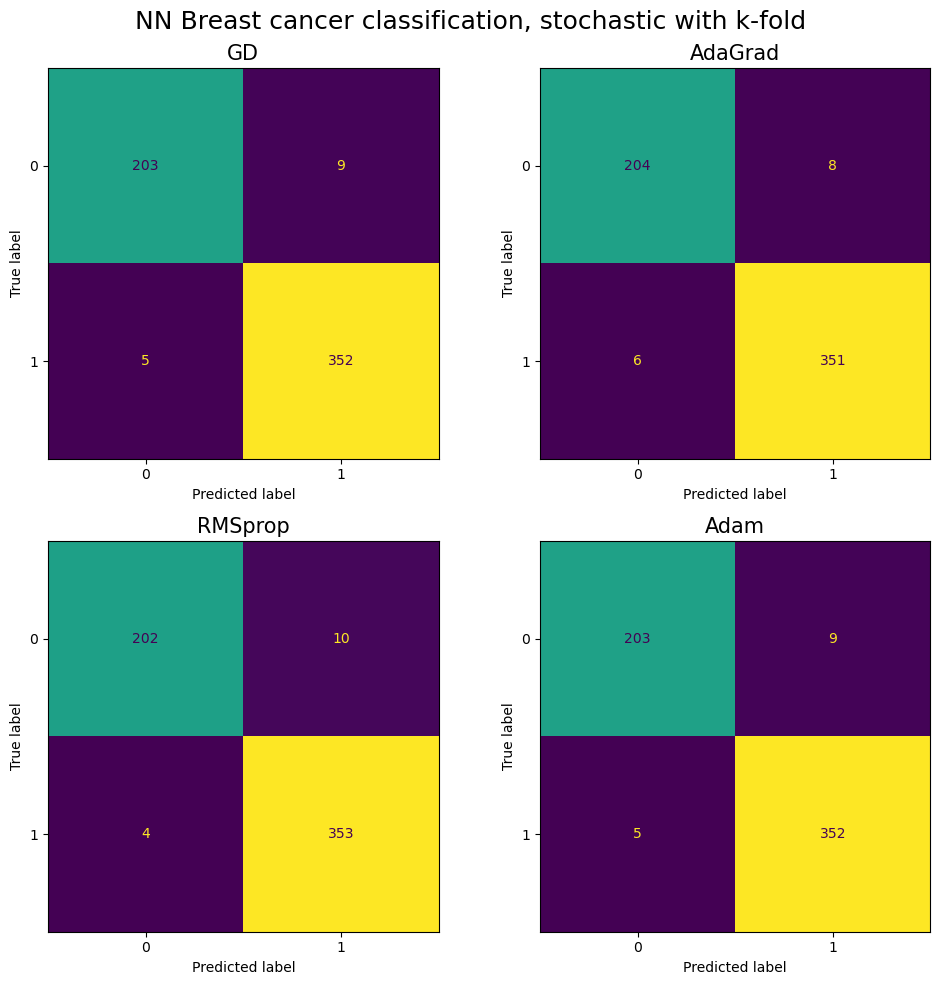

In [120]:
Predictions_stok_kfold, Targets_stok_kfold = pred_target_dict(commands, case_stok_kfold, target_stok_kfold)
Title_stok_k = "NN Breast cancer classification, stochastic with k-fold"
Filename_stok_k = "Stok_kfold"
plot_confusion_matrices(Predictions_stok_kfold, Targets_stok_kfold, Title_stok_k, Filename_stok_k, Optimizer=commands)

# Checking MLP after k-fold

In [121]:
case_MLP_kfold, target_MLP_kfold = kFold_multiple(5, "Stochastic", ["GD","Adam"], 
                                    initial_conditions, 
                                    Custom = None, 
                                    Data_type = "cancer", Gradient_type="Back",
                                    MLP=True, sklearn = False)

Accuracy MLP = 0.97368
Accuracy MLP = 0.95614
Accuracy MLP = 0.97368
Accuracy MLP = 0.98246
Accuracy MLP = 0.98230
For Stochastic with GD
Mean acc from after 5-folds = 0.9737
Accuracy MLP = 0.96491
Accuracy MLP = 0.95614
Accuracy MLP = 0.98246
Accuracy MLP = 0.99123
Accuracy MLP = 0.96460
For Stochastic with Adam
Mean acc from after 5-folds = 0.9719


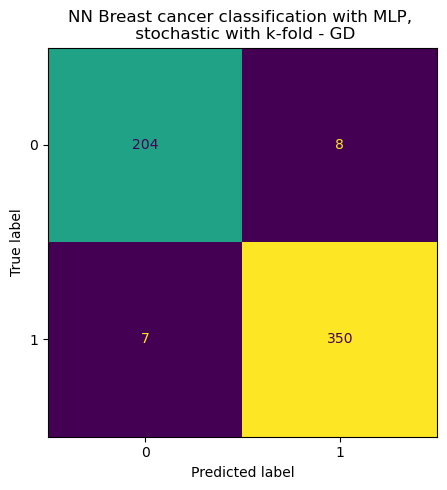

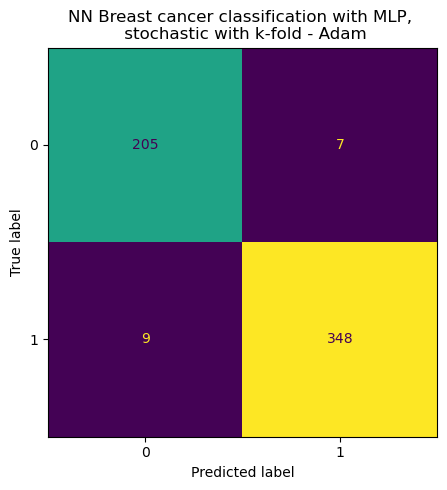

In [122]:
Predictions_MLP_kfold, Targets_MLP_kfold = pred_target_dict(["GD","Adam"], case_MLP_kfold, target_MLP_kfold)
Title_MLPGD_k = f"NN Breast cancer classification with MLP, \n stochastic with k-fold"
Filename_MLPGD_k = "MLP_kfold"

Title_MLPAdam_k = f"NN Breast cancer classification with MLP, \n stochastic with k-fold"
Filename_MLPAdam_k = "MLP_kfold"
plot_confusion_matrices(Predictions_MLP_kfold, Targets_MLP_kfold, Title_MLPGD_k, Filename_MLPGD_k, Optimizer=["GD"])
plot_confusion_matrices(Predictions_MLP_kfold, Targets_MLP_kfold, Title_MLPAdam_k, Filename_MLPAdam_k, Optimizer=["Adam"])

# Logistic Regression

In [123]:

Logistic_condition = {
    "layer_output_sizes": np.array([1]),
    "activation_funcs": [sigmoid],
    "activation_ders": [sigmoid_der],
    "cost_fun": cross_entropy,
    "cost_der": cross_entropy_der,
    "rho":0.9 ,
    "eta_Normal": {"GD": 0.1, "AdaGrad": 0.1, "Adam": 0.01, "RMSprop": 0.001}, 
    "eta_Stochastic": {"GD": 0.1, "AdaGrad": 0.1, "Adam": 0.01, "RMSprop": 0.001}, 
}
Inputs, Targets = get_data("cancer")
scaler = StandardScaler()
Inputs = scaler.fit_transform(Inputs)

In [124]:
case_list_log , target_list_log = train_command(Inputs, Targets, ["Normal","Stochastic"], 
                                            commands, Gradient_type= "Back", 
                                            initial_conditions=initial_conditions, 
                                            MLP=True, Custom = Logistic_condition)

For Normal, with GD, momentum = True:
Accuracy    = 0.98246
For Normal, with AdaGrad, momentum = True:
Accuracy    = 0.98246
For Normal, with RMSprop, momentum = True:
Accuracy    = 0.98246
For Normal, with Adam, momentum = True:
Accuracy    = 0.98246
For Stochastic, with GD, momentum = True:
Accuracy MLP = 0.98830
Accuracy    = 0.98830
For Stochastic, with AdaGrad, momentum = True:
Accuracy    = 0.98830
For Stochastic, with RMSprop, momentum = True:
Accuracy    = 0.96491
For Stochastic, with Adam, momentum = True:
Accuracy MLP = 0.98246
Accuracy    = 0.98830


In [125]:
case_norm_kfold_LR, target_norm_kfold_LR = kFold_multiple(5, "Normal", commands, 
                                        initial_conditions, 
                                        Custom = Logistic_condition, 
                                        Data_type = "cancer", Gradient_type="Back",
                                        MLP=False, sklearn = False)

Accuracy = 0.9737
Accuracy = 0.9386
Accuracy = 0.9737
Accuracy = 0.9912
Accuracy = 0.9912
For Normal with GD
Mean acc after 5-folds = 0.9737
Accuracy = 0.9649
Accuracy = 0.9561
Accuracy = 0.9737
Accuracy = 0.9737
Accuracy = 0.9912
For Normal with AdaGrad
Mean acc after 5-folds = 0.9719
Accuracy = 0.9649
Accuracy = 0.9474
Accuracy = 0.9649
Accuracy = 0.9825
Accuracy = 0.9912
For Normal with RMSprop
Mean acc after 5-folds = 0.9702
Accuracy = 0.9649
Accuracy = 0.9386
Accuracy = 0.9649
Accuracy = 0.9825
Accuracy = 0.9823
For Normal with Adam
Mean acc after 5-folds = 0.9666


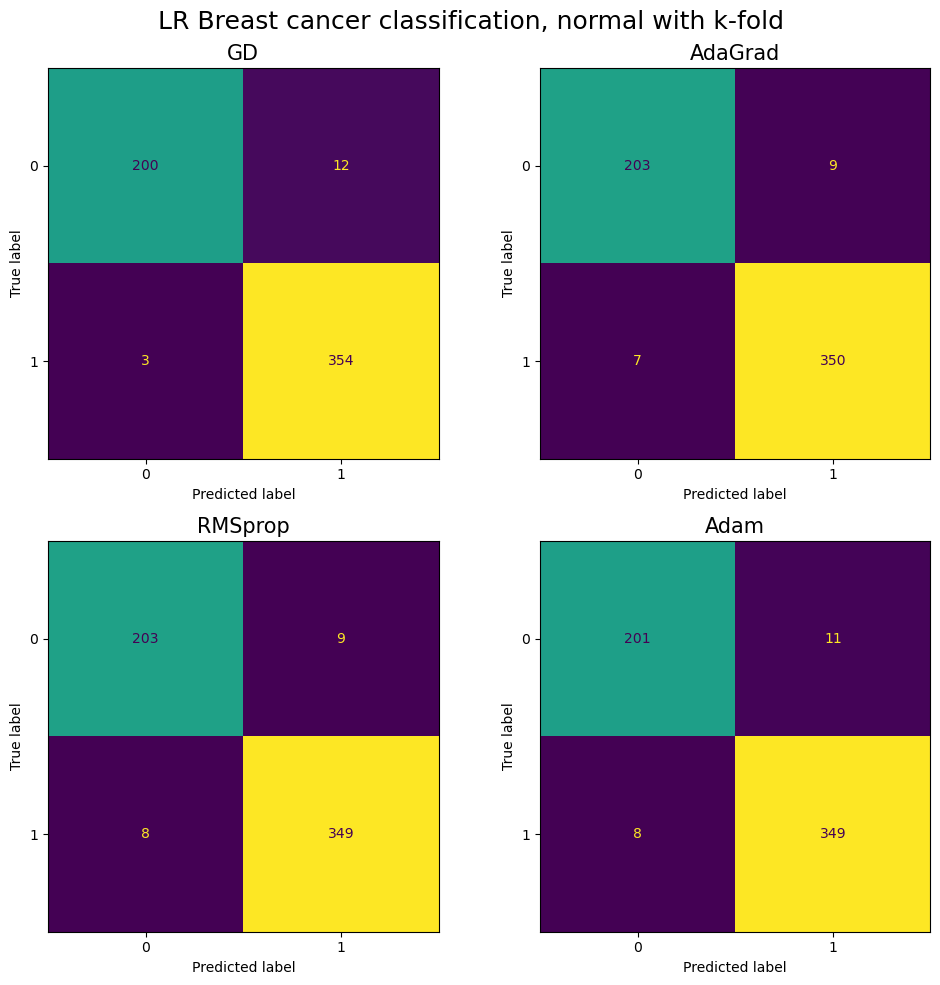

In [126]:
Predictions_norm_kfold_LR, Targets_norm_kfold_LR = pred_target_dict(commands, case_norm_kfold_LR, target_norm_kfold_LR)
Title_Norm_k_LR = "LR Breast cancer classification, normal with k-fold"
Filename_Norm_k_LR = "LR_Normal_kfold"
plot_confusion_matrices(Predictions_norm_kfold_LR, Targets_norm_kfold_LR, Title_Norm_k_LR, Filename_Norm_k_LR, Optimizer=commands)

In [127]:
case_stok_kfold_LR, target_stok_kfold_LR = kFold_multiple(5, "Stochastic", commands, 
                                        initial_conditions, 
                                        Custom = Logistic_condition, 
                                        Data_type = "cancer", Gradient_type="Back",
                                        MLP=False, sklearn = False)

Accuracy = 0.9737
Accuracy = 0.9386
Accuracy = 0.9737
Accuracy = 0.9912
Accuracy = 0.9912
For Stochastic with GD
Mean acc after 5-folds = 0.9737
Accuracy = 0.9737
Accuracy = 0.9561
Accuracy = 0.9825
Accuracy = 0.9912
Accuracy = 0.9912
For Stochastic with AdaGrad
Mean acc after 5-folds = 0.9789
Accuracy = 0.9211
Accuracy = 0.9211
Accuracy = 0.9737
Accuracy = 0.9912
Accuracy = 0.9735
For Stochastic with RMSprop
Mean acc after 5-folds = 0.9561
Accuracy = 0.9737
Accuracy = 0.9474
Accuracy = 0.9737
Accuracy = 0.9912
Accuracy = 0.9912
For Stochastic with Adam
Mean acc after 5-folds = 0.9754


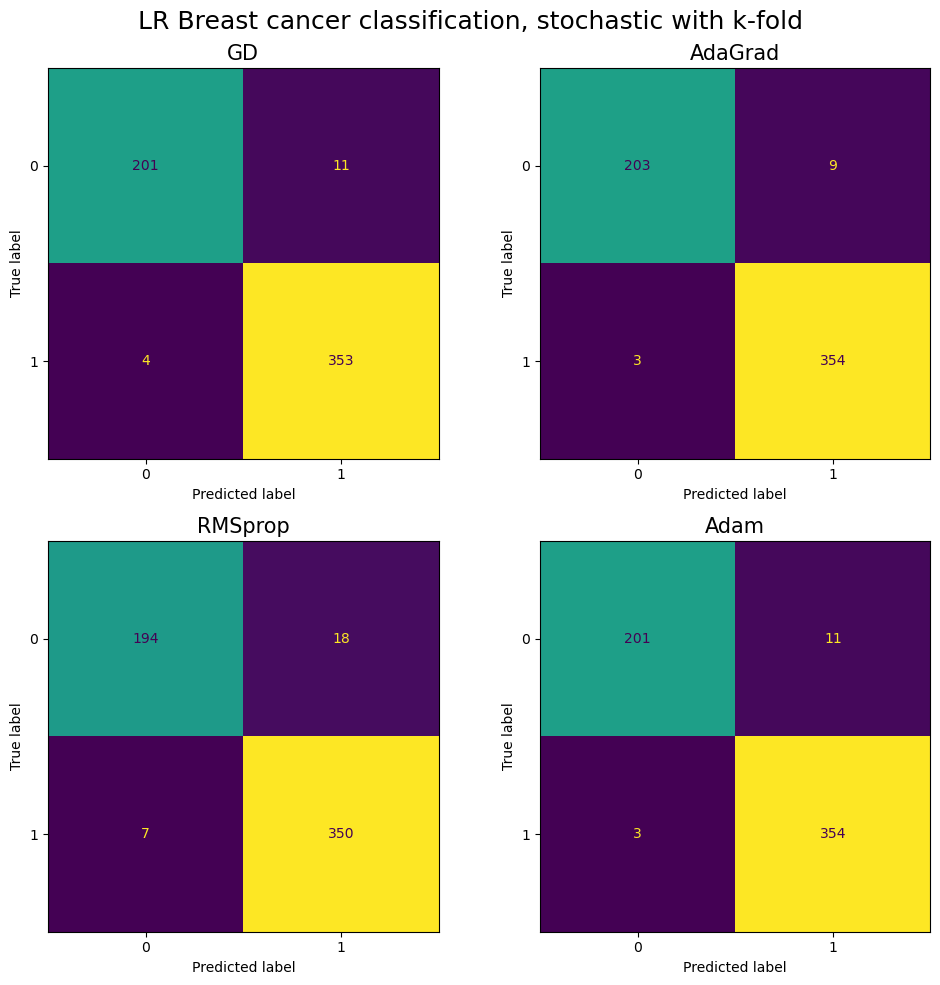

In [128]:
Predictions_stok_kfold_LR, Targets_stok_kfold_LR = pred_target_dict(commands, case_stok_kfold_LR, target_stok_kfold_LR)
Title_stok_k_LR = "LR Breast cancer classification, stochastic with k-fold"
Filename_stok_k_LR = "LR_Stok_kfold"
plot_confusion_matrices(Predictions_stok_kfold_LR, Targets_stok_kfold_LR, Title_stok_k_LR, Filename_stok_k_LR, Optimizer=commands)

# Checking logistic regression using LogisticRegression frm scikit-learn

In [129]:
case_SKL_kfold_LR, target_SKL_kfold_LR = kFold_multiple(5, "Stochastic", [commands[0]], 
                                        initial_conditions, 
                                        Custom = Logistic_condition, 
                                        Data_type = "cancer", Gradient_type="Back",
                                        MLP=False, sklearn = True)

Accuracy from LR = 0.9737
Accuracy from LR = 0.9561
Accuracy from LR = 0.9737
Accuracy from LR = 0.9825
Accuracy from LR = 0.9912
For Stochastic with GD
Mean acc from after 5-folds = 0.9754


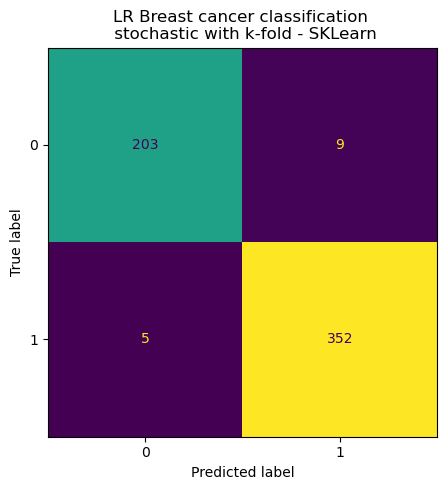

In [130]:
Predictions_SKL_kfold_LR, Targets_SKL_kfold_LR = pred_target_dict(["SKLearn"], case_SKL_kfold_LR, target_SKL_kfold_LR)
Title_SKL_k_LR = f"LR Breast cancer classification \n stochastic with k-fold"
Filename_SKL_k_LR = "LR_SKL_kfold"
plot_confusion_matrices(Predictions_SKL_kfold_LR, Targets_SKL_kfold_LR, Title_SKL_k_LR, Filename_SKL_k_LR, Optimizer=["SKLearn"])

# Looking at accuracy development over complexity

In [131]:
from Functions import accmatrix_layers_neurons, heatmap_acc

In [12]:
initial_conditions = {
    "batch_size": 10,
    "tolerance": 1e-5,
    "beta1": 0.9,
    "max_iter": 3000,
    "beta2": 0.999,
    "use_momentum": False,
    "rho": 0.9,
    "Delta": 1e-7,
    "eta_Normal": {"GD": 0.1, "AdaGrad": 0.1, "Adam": 0.01, "RMSprop": 0.001}, 
    "eta_Stochastic": {"GD": 0.1, "AdaGrad": 0.1, "Adam": 0.01, "RMSprop": 0.001}, 
    "cost_fun": cross_entropy,
    "cost_der": cross_entropy_der,
    "lamda": 0.0,
    "dm": 0.1
}



Inputs, Targets = get_data("cancer")
Inputs = scaler.fit_transform(Inputs)
Neurons = [20, 100, 200, 300, 400]
Layers = [2, 4, 6, 8, 10]


In [ ]:
np.random.seed(2024)
random.seed(2024)
#Takes a while to run

acc_matrix = accmatrix_layers_neurons(Inputs, Targets, "Normal", "AdaGrad", 
                       initial_conditions, 
                       Layers, 
                       Neurons, 
                       Gradient_type="Back")


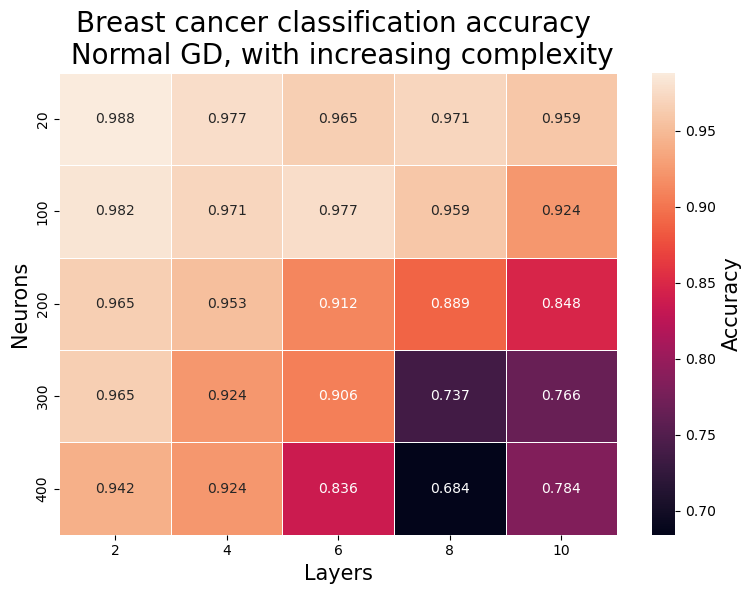

In [16]:

Title_acc_map = f"Breast cancer classification accuracy \n Normal GD, with increasing complexity"
Filename_accmap = "Normal_GD" 
heatmap_acc(acc_matrix, Title_acc_map, Filename_accmap, Layers, Neurons, LogScale=False)